<a href="https://colab.research.google.com/github/Allen001822480/Info7374SpringTeam5/blob/Assignment2/assignment2_experiment1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
file_url = "http://cs231n.stanford.edu/tiny-imagenet-200.zip"
tr = requests.get(file_url, stream=True)
with open("tinyimagenet32_train.zip", "wb") as f:
    for chunk in tr.iter_content(chunk_size=1024):
        if chunk:
            f.write(chunk)
            
            
import zipfile
import os
def un_zip(file_name):
    """unzip zip file"""
    zip_file = zipfile.ZipFile(file_name)
    if os.path.isdir(file_name + "_files"):
        pass
    else:
        os.mkdir(file_name + "_files")
    for names in zip_file.namelist():
        zip_file.extract(names,file_name + "_files/")
    zip_file.close()
        
imagenet32_train = un_zip("tinyimagenet32_train.zip")

In [0]:
!pip install Pillow==4.0.0
!pip install PIL

  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL


In [0]:
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
import os
import keras

def read_img(img_name):
    img64 = Image.open(img_name).convert('RGB')
    img32 = img64.resize((32, 32),Image.ANTIALIAS)
    data = np.array(img32)
    return data

images = []
labels = []
dir = './tinyimagenet32_train.zip_files/tiny-imagenet-200/train/'
i = 0
for folder in os.listdir(dir):
    folderpath = dir + folder +'/images/'
    for file in os.listdir(folderpath):
        if file.endswith('.JPEG'):
            filedir = folderpath + file
            images.append(read_img(filedir))
            labels.append(i)
    i = i+1
        
seed = 10
np.random.seed(seed)
num_classes = 200
x = np.array(images)
y = np.array(labels)
y = keras.utils.to_categorical(y, num_classes)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

Train on 70000 samples, validate on 30000 samples
Epoch 1/30
70000/70000 [==============================] - 25s 358us/step - loss: 5.1510 - acc: 0.0237 - val_loss: 4.7298 - val_acc: 0.0457
Epoch 2/30
70000/70000 [==============================] - 22s 315us/step - loss: 4.7301 - acc: 0.0493 - val_loss: 4.5849 - val_acc: 0.0644
Epoch 3/30
70000/70000 [==============================] - 22s 313us/step - loss: 4.5733 - acc: 0.0637 - val_loss: 4.3779 - val_acc: 0.0880
Epoch 4/30
70000/70000 [==============================] - 22s 313us/step - loss: 4.4759 - acc: 0.0751 - val_loss: 4.2970 - val_acc: 0.0997
Epoch 5/30
70000/70000 [==============================] - 22s 313us/step - loss: 4.4153 - acc: 0.0812 - val_loss: 4.2403 - val_acc: 0.1048
Epoch 6/30
70000/70000 [==============================] - 22s 312us/step - loss: 4.3615 - acc: 0.0879 - val_loss: 4.1386 - val_acc: 0.1219
Epoch 7/30
70000/70000 [==============================] - 22s 312us/step - loss: 4.3182 - acc: 0.0930 - val_loss: 4.

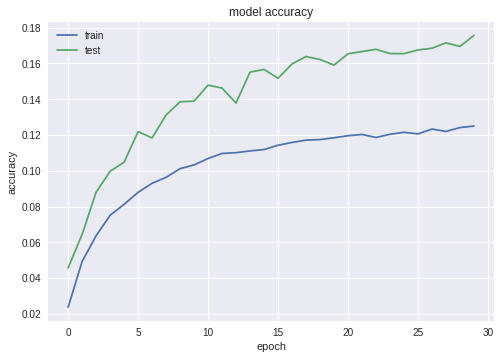

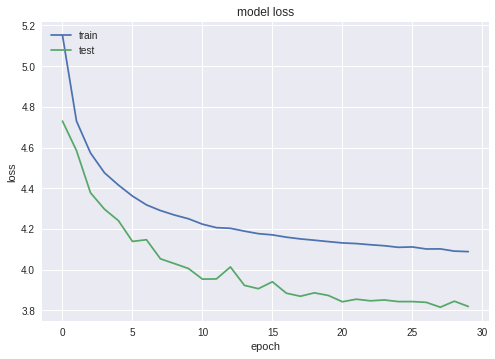

In [0]:
import keras
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization,GlobalAveragePooling2D
import os
import matplotlib.pyplot as plt

batch_size = 64
num_classes = 200
epochs = 30
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'imagenet_selfbuilt1.h5'

model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

'''model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
'''


model.add(GlobalAveragePooling2D())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-4)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

h=model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test,y_test),
            shuffle=True)

model_path = os.path.join(save_dir, model_name)
isExists=os.path.exists(model_path)
if not isExists:
  os.makedirs(model_path)
model.save(os.path.join(model_path,model_name))
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 70000 samples, validate on 30000 samples
Epoch 1/30
70000/70000 [==============================] - 18s 263us/step - loss: 5.3113 - acc: 0.0153 - val_loss: 5.0732 - val_acc: 0.0226
Epoch 2/30
70000/70000 [==============================] - 16s 233us/step - loss: 5.0249 - acc: 0.0308 - val_loss: 4.9775 - val_acc: 0.0373
Epoch 3/30
70000/70000 [==============================] - 16s 234us/step - loss: 4.8237 - acc: 0.0459 - val_loss: 4.5797 - val_acc: 0.0685
Epoch 4/30
70000/70000 [==============================] - 16s 234us/step - loss: 4.6844 - acc: 0.0570 - val_loss: 4.4502 - val_acc: 0.0779
Epoch 5/30
70000/70000 [==============================] - 16s 234us/step - loss: 4.6042 - acc: 0.0689 - val_loss: 4.4532 - val_acc: 0.0786
Epoch 6/30
70000/70000 [==============================] - 16s 234us/step - loss: 4.5387 - acc: 0.0750 - val_loss: 4.3487 - val_acc: 0.0934
Epoch 7/30
70000/70000 [==============================] - 16s 234us/step - loss: 4.4875 - acc: 0.0819 - val_loss: 4.

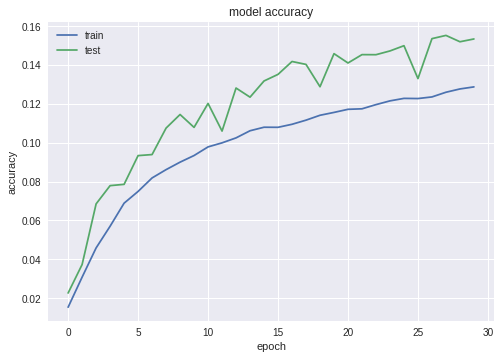

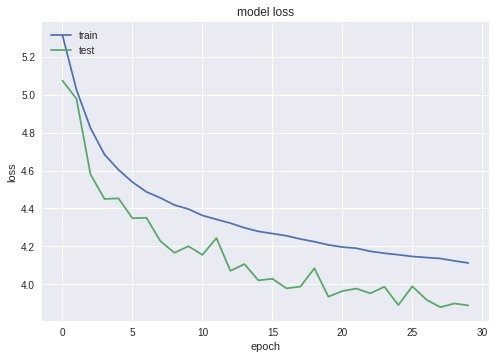

In [0]:
import keras
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization,GlobalAveragePooling2D
import os
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 200
epochs = 30
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'imagenet_selfbuilt2.h5'

model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(GlobalAveragePooling2D())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-4)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

h=model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test,y_test),
            shuffle=True)

model_path = os.path.join(save_dir, model_name)
isExists=os.path.exists(model_path)
if not isExists:
  os.makedirs(model_path)
model.save(os.path.join(model_path,model_name))
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
!pip install autokeras

  Using cached https://files.pythonhosted.org/packages/1c/f6/fede04262a0c7244cb36fe85449c72629d148f37aa3cad76b4dab2409cbe/autokeras-0.3.7.tar.gz
  Using cached https://files.pythonhosted.org/packages/67/e6/6d4edaceee6a110ecf6f318482f5229792f143e468b34a631f5a0899f56d/scipy-1.2.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/92/1ae072a56665e36e81046d5fb8a2f39c7728c25c21df1777486c49b179ae/torch-1.0.1-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 13.9MB 1.4MB/s 
    100% |████████████████████████████████| 25.3MB 1.3MB/s 
    100% |████████████████████████████████| 51kB 14.6MB/s 
    100% |████████████████████████████████| 83.1MB 496kB/s 
    100% |████████████████████████████████| 61kB 22.7MB/s 
    100% |████████████████████████████████| 8.9MB 2.5MB/s 
    100% |████████████████████████████████| 1.6MB 5.7MB/s 
    100% |████████████████████████████████| 1.4MB 3.5MB/s 
    100% |████████████████████████████████| 14

In [0]:
import keras
from sklearn.metrics import classification_report
from keras.models import load_model
from keras.utils import plot_model
import autokeras as ak
import os

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_dir = os.path.join(save_dir,'autokeras_model1.h5')
model_png = os.path.join(save_dir,'autokeras_model1.png')
isExists=os.path.exists(save_dir)
if not isExists:
  os.makedirs(save_dir)
training_times = 3*60*60

Y = np.array(labels)
Y_train, Y_test = train_test_split(Y, test_size=0.3, random_state=seed)
model = ak.ImageClassifier(verbose=True,augment=False)
model.fit(x_train, Y_train, time_limit=training_times)
model.final_fit(x_train, Y_train, x_test, Y_test, retrain=True)

model.export_keras_model(model_dir)
m = load_model(model_dir)
plot_model(m, to_file=model_png)

labelNames = list(range(0,200))
score = model.evaluate(x_test, Y_test)
predictions = model.predict(x_test)
report = classification_report(Y_test, predictions,
target_names=labelNames)
p = os.path.sep.join(dir, "3*60*60.txt")
f = open(p, "w")
f.write(report)
f.write("\nscore: {}".format(score))
f.close()

Saving Directory: /tmp/autokeras_PICI7S
Preprocessing the images.
Preprocessing finished.

Initializing search.
Initialization finished.


+----------------------------------------------+
|               Training model 0               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           0            |   14.643148565292359   |         0.1928         |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|               Training model 1               |
+----------------------------------------------+
                              

NameError: ignored

In [0]:
labelNames = list(range(0,200))
labelNames = list(map(str,labelNames))
score = model.evaluate(x_test, Y_test)
predictions = model.predict(x_test)
report = classification_report(Y_test, predictions,
target_names=labelNames)
p = os.path.join(save_dir, "3*60*60.txt")
f = open(p, "w")
f.write(report)
f.write("\nscore: {}".format(score))
f.close()

In [20]:
from keras.models import load_model
from keras.utils import plot_model
model.export_keras_model(model_dir)
m = load_model(model_dir)
plot_model(m, to_file=model_png)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [7]:
import keras
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization,GlobalAveragePooling2D
import os
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 200
epochs = 30
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'imagenet_selfbuilt2.h5'

model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(GlobalAveragePooling2D())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-4)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 16)        2320      
_________________________________________________________________
activation_26 (Activation)   (None, 30, 30, 16)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 30, 30, 16)        64        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 16)        0         
__________